In [1]:
from sklearn.feature_extraction import DictVectorizer #字典特征抽取
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #文本特征抽取

from sklearn.preprocessing import MinMaxScaler, StandardScaler #预处理 归一化 标准化

from sklearn.feature_selection import VarianceThreshold  #特征选择 Filter过滤式
from sklearn.decomposition import PCA #降维分解 主成分分析

import jieba
import numpy as np

from sklearn.impute import SimpleImputer #处理缺失值

# 特征抽取
## 特征中含有字符串（当成类别），如何做特征抽取

In [17]:
def dictvec():
    dict1=DictVectorizer(sparse=True) #sparse为True时输出去掉0的稀疏矩阵 False输出含0的3*4矩阵
    #one-hot编码（独热码）
    
    data=dict1.fit_transform([{'city':'北京','temperature':100},
                              {'city':'上海','temperature':63},
                              {'city':'深圳','temperature':30}])
    print(data)
    print('-'*50)
    print(data.toarray())
    print('-'*50)
    print(dict1.get_feature_names_out())
    print('-'*50)
    print(dict1.inverse_transform(data))
    return None

dictvec()

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	1.0
  (0, 3)	100.0
  (1, 0)	1.0
  (1, 3)	63.0
  (2, 2)	1.0
  (2, 3)	30.0
--------------------------------------------------
[[  0.   1.   0. 100.]
 [  1.   0.   0.  63.]
 [  0.   0.   1.  30.]]
--------------------------------------------------
['city=上海' 'city=北京' 'city=深圳' 'temperature']
--------------------------------------------------
[{'city=北京': np.float64(1.0), 'temperature': np.float64(100.0)}, {'city=上海': np.float64(1.0), 'temperature': np.float64(63.0)}, {'city=深圳': np.float64(1.0), 'temperature': np.float64(30.0)}]


## 一段英文文本如何转换为数值类型

In [3]:
def convec():
    vector=CountVectorizer(min_df=3)
    res = vector.fit_transform(
        ["life is  short,i like python life",
         "life is too long,i dislike python",
         "life is short"])

    # 打印结果,把每个词都分离了
    print(vector.get_feature_names_out())
    print('-'*50)
    print(res)
    print('-'*50)
    print(type(res))
    # 对照feature_names，标记每个词出现的次数
    print('-'*50)
    print(res.toarray()) #稀疏矩阵转换为数组
    print('-'*50)
    #拿每个样本里的特征进行显示
    print(vector.inverse_transform(res))

convec()

['is' 'life']
--------------------------------------------------
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (3, 2)>
  Coords	Values
  (0, 1)	2
  (0, 0)	1
  (1, 1)	1
  (1, 0)	1
  (2, 1)	1
  (2, 0)	1
--------------------------------------------------
<class 'scipy.sparse._csr.csr_matrix'>
--------------------------------------------------
[[1 2]
 [1 1]
 [1 1]]
--------------------------------------------------
[array(['life', 'is'], dtype='<U4'), array(['life', 'is'], dtype='<U4'), array(['life', 'is'], dtype='<U4')]


# 中文分词

In [13]:
def countvec():
    """
    对文本进行特征值化,单个汉字单个字母不统计，因为单个汉字字母没有意义
    :return: None
    """
    cv = CountVectorizer()
    #汉字需要空格分词，但一般文本不会在词汇间添加空格，因此需要使用jieba
    data = cv.fit_transform(["人生苦短，我喜欢 python python", "人生漫长，不用 python"])

    print(cv.get_feature_names_out())
    print('-'*50)
    print(data) #稀疏存储，只记录非零位置
    print('-'*50)
    print(data.toarray())

    return None


countvec()

['python' '不用' '人生漫长' '人生苦短' '我喜欢']
--------------------------------------------------
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (2, 5)>
  Coords	Values
  (0, 3)	1
  (0, 4)	1
  (0, 0)	2
  (1, 0)	1
  (1, 2)	1
  (1, 1)	1
--------------------------------------------------
[[2 0 0 1 1]
 [1 1 1 0 0]]


In [11]:
def cutword():
    """
    通过jieba对中文进行分词
    :return:
    """
    con1 = jieba.cut("今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。")

    con2 = jieba.cut("我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。")

    con3 = jieba.cut("如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。")

    # 类型是生成器
    # print(type(con1))
    # print('-' * 50)
    # 把生成器转换成列表
    content1 = list(con1)
    content2 = list(con2)
    content3 = list(con3)
    # print(content1)
    # print(content2)
    # print(content3)
    # 把列表转换成字符串,每个词之间用空格隔开
    # print('-' * 50)
    c1 = ' '.join(content1)
    c2 = ' '.join(content2)
    c3 = ' '.join(content3)

    return c1, c2, c3


def hanzivec():
    """
    中文特征值化
    :return: None
    """
    c1, c2, c3 = cutword() #jieba分词好的中文文本
    print('-'*50)
    print(c1)
    print(c2)
    print(c3)
    print('-'*50)

    cv = CountVectorizer() #实例化

    data = cv.fit_transform([c1, c2, c3])

    print(cv.get_feature_names_out())

    print(data.toarray())

    return None

# cutword()
hanzivec()

--------------------------------------------------
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。
我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。
如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
--------------------------------------------------
['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '星系' '晚上' '某样' '残酷' '每个'
 '看到' '真正' '秘密' '绝对' '美好' '联系' '过去' '这样']
[[0 0 1 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 0 0 1 1 0 0 0]
 [0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 3 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 1]
 [1 1 0 0 4 3 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 2 1 0 0 1 0 0]]


## tf-idf (term frequency-inverse documentary frequency)

In [14]:
#tf 通过词频判断重要性
#idf 此文档中反复出现 而其他文档中没有 区分度大 重要性高
#用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度

#log(总文档数量n/该词出现的文档数量n(x))  以10为低

# smooth_idf布尔值，默认 = True
# 通过在文档频率上加一来平滑 idf 权重，就好像看到一个额外的文档包含集合中的每个术语恰好一次。防止零分裂。
# 比如训练集中有某个词，测试集中没有，就是生僻词，就会造成n(x)分母为零，log(n/n(x)),从而出现零分裂

def tfidfvec():
    """
    中文特征值化,计算tfidf值
    :return: None
    """
    c1, c2, c3 = cutword()
    
    print('*'*50)
    print(c1, c2, c3)
    print(type([c1, c2, c3]))
    tf = TfidfVectorizer(smooth_idf=True) #实例化

    data = tf.fit_transform([c1, c2, c3]) #返回词的权重矩阵

    print(tf.get_feature_names_out())
    print('-'*50)
    print(type(data)) #类型为csr_matrix (compressed sparse row matrix 压缩稀疏行矩阵)
    print('-'*50)
    print(data.toarray())
    print(data.shape)

    return None


tfidfvec()

**************************************************
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。 我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。 如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
<class 'list'>
['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '星系' '晚上' '某样' '残酷' '每个'
 '看到' '真正' '秘密' '绝对' '美好' '联系' '过去' '这样']
--------------------------------------------------
<class 'scipy.sparse._csr.csr_matrix'>
--------------------------------------------------
[[0.         0.         0.21821789 0.         0.         0.
  0.43643578 0.         0.         0.         0.         0.
  0.21821789 0.         0.21821789 0.         0.         0.
  0.         0.21821789 0.21821789 0.         0.43643578 0.
  0.21821789 0.         0.43643578 0.21821789 0.         0.
  0.         0.21821789 0.21821789 0.         0.         0.       

# 特征处理 归一化

In [23]:
def mm():
    """
    归一化处理
    :return: NOne
    """
    # 归一化缺点 容易受极值的影响
    #feature_range代表特征值范围，一般设置为(0,1),或者(-1,1),默认是(0,1)
    mm = MinMaxScaler(feature_range=(0, 1))

    data = mm.fit_transform([[90, 2, 10, 40], [47, 4, 64, 35], [75, 3, 13, 46]])

    print(data)
    print('-'*50)
    out=mm.transform([[1, 2, 3, 4],[6, 5, 8, 7]])
    print(out)
    return None
    #transform和fit_transform不同是，transform用于测试集，而且不会重新找最小值和最大值


mm()

[[1.         0.         0.         0.45454545]
 [0.         1.         1.         0.        ]
 [0.65116279 0.5        0.05555556 1.        ]]
--------------------------------------------------
[[-1.06976744  0.         -0.12962963 -2.81818182]
 [-0.95348837  1.5        -0.03703704 -2.54545455]]


## 标准化

In [24]:
def stand():
    """
    标准化缩放，不是标准正太分布，只均值为0，方差为1的分布
    :return:
    """
    std = StandardScaler()

    data = std.fit_transform([[1., -1., 3.], [2., 4., 2.], [4., 6., -1.]])

    print(data)
    print('-' * 50)
    print(std.mean_)
    print('-' * 50)
    print(std.var_)
    print(std.n_samples_seen_)  # 样本数
    return data


data=stand()

[[-1.06904497 -1.35873244  0.98058068]
 [-0.26726124  0.33968311  0.39223227]
 [ 1.33630621  1.01904933 -1.37281295]]
--------------------------------------------------
[2.33333333 3.         1.33333333]
--------------------------------------------------
[1.55555556 8.66666667 2.88888889]
3


In [27]:
print(type(data))
std1 = StandardScaler()
#为了证明上面输出的结果的均值是为0的，方差为1
data1 = std1.fit_transform(data)
# print(data1)  #这个并不是我们想看的，没意义
# 均值
print(std1.mean_)
# 方差
print(std1.var_)

<class 'numpy.ndarray'>
[[-1.06904497 -1.35873244  0.98058068]
 [-0.26726124  0.33968311  0.39223227]
 [ 1.33630621  1.01904933 -1.37281295]]
[-1.48029737e-16  7.40148683e-17  7.40148683e-17]
[1. 1. 1.]


# 缺失值处理

In [28]:
#下面是填补，针对删除，可以用pd和np
def im():
    """
    缺失值处理
    :return:NOne
    """
    # NaN, nan,缺失值必须是这种形式，如果是？号(或者其他符号)，就要replace换成这种
    im = SimpleImputer(missing_values=np.nan, strategy='mean')

    data = im.fit_transform([[1, 2], [np.nan, 3], [7, 6], [3, 2]])

    print(data)

    return None


im()

[[1.         2.        ]
 [3.66666667 3.        ]
 [7.         6.        ]
 [3.         2.        ]]


# 降维

In [33]:
def var():
    """
    特征选择-删除低方差的特征
    :return: None
    """
    #默认只删除方差为0,threshold是方差阈值，删除比这个值小的那些特征
    var = VarianceThreshold(threshold=0.1)

    data = var.fit_transform([[0, 2, 0, 3],
                              [0, 1, 4, 3],
                              [0, 1, 1, 3]])
    # 在一个特征内求方差 该特征方差小于阈值 说明该特征区分度低 可以删除 
    # 如上例中 0列和3列方差均为0 因此删除

    print(data)
    # 获得剩余的特征的列编号
    print('The surport is %s' % var.get_support(True))
    return None


var()

[[2 0]
 [1 4]
 [1 1]]
The surport is [1 2]


In [38]:
def pca():
    """
    主成分分析进行特征降维
    :return: None
    """
    # n_ components:小数 0~1 90% 业界选择 90~95%

    # 当n_components的值为0到1之间的浮点数时，表示我们希望保留的主成分解释的方差比例。方差比例是指 得到输出的每一列的方差值和除以原有数据方差之和。
    # 具体而言，n_components=0.9表示我们希望选择足够的主成分，以使它们解释数据方差的90%。

    # n_components如果是整数   减少到的特征数量
    
    # 原始数据方差
    original_value = np.array([[2, 8, 4, 5], [6, 3, 0, 8], [5, 4, 9, 1]])
    print(np.var(original_value, axis=0).sum()) #最初数据的方差
    print('-'* 50)
    pca = PCA(n_components=0.9)

    data = pca.fit_transform(original_value)

    print(data)
    print(type(data))
    #计算data的方差
    print(np.var(data, axis=0).sum())
    print('-'*50)
    print(pca.explained_variance_ratio_)
    # 计算data的方差占总方差的比例
    print(pca.explained_variance_ratio_.sum())

    return None


pca()

29.333333333333336
--------------------------------------------------
[[-1.28620952e-15  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
<class 'numpy.ndarray'>
29.333333333333332
--------------------------------------------------
[0.75 0.25]
1.0


# 均匀分布

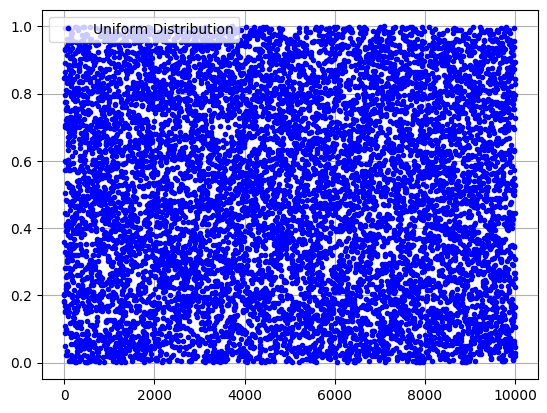

In [42]:
from matplotlib import pyplot as plt
x = np.random.rand(10000) #每个的概率
t = np.arange(len(x))
plt.plot(t,x,'b.',label="Uniform Distribution")
plt.legend(loc="upper left")
plt.grid()
plt.show()